# Análise exploratória de dados

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns 
from IPython.display import display, Markdown 

## 1. Descrição dos dados

### Conjunto de dados

A análise utiliza o dataset 'Titanic: Machine Learning from Disaster', disponível no Kaggle. A base contém informações sobre passageiros do Titanic, como idade, sexo, classe de cabine, número de familiares a bordo, entre outras variáveis. Com esses dados, é possível realizar uma análise aprofundada sobre o impacto de fatores socioeconômicos e pessoais nas chances de sobrevivência durante o desastre.

In [40]:
df = pd.read_csv('../data/raw/train.csv')
df.to_csv('../data/raw/train.csv', index=False)

#### Dimensão do DataFrame


In [4]:
df.shape

(891, 12)

#### Visão geral dos dados


In [5]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Informações da tabela


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Colunas da tabela


In [7]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Dicionário de dados


In [41]:
df_dc = pd.read_csv('../data/external/Titanic__dataDictionary.csv')
df_dc.head()

,Variable,Definition,Key,Tipo,Subtipo
0,survival,Survival,"0 = No, 1 = Yes",Qualitativa,Nominal
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd",Qualitativa,Ordinal
2,sex,Sex,NaN,Qualitativa,Nominal
3,Age,Age in years,NaN,Quantitativa,Continua
4,sibsp,# of siblings / spouses aboard the Titanic,NaN,Quantitativa,Discreta


#### Adição de duas colunas na documentação


É necessária duas colunas com o tipo e o subtipo das variáveis no discionário, que serão adicionadas abaixo.



In [42]:
caminho = '../data/external/Titanic__dataDictionary.csv'

df_dc = pd.read_csv(caminho)

# adição da coluna tipo
Tipo = [
    'Qualitativa', 'Qualitativa', 'Qualitativa', 'Quantitativa', 
    'Quantitativa', 'Quantitativa', 'Qualitativa', 'Quantitativa', 
    'Qualitativa', 'Qualitativa'
]

# adição da coluna subtipo
Subtipo = [
    'Nominal', 'Ordinal', 'Nominal', 'Continua', 
    'Discreta', 'Discreta', 'Nominal', 'Continua', 
    'Nominal', 'Nominal'
]

df_dc['Tipo'] = Tipo
df_dc['Subtipo'] = Subtipo

df_dc.to_csv(caminho, index=False)


In [43]:
df_dc.head()


,Variable,Definition,Key,Tipo,Subtipo
0,survival,Survival,"0 = No, 1 = Yes",Qualitativa,Nominal
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd",Qualitativa,Ordinal
2,sex,Sex,NaN,Qualitativa,Nominal
3,Age,Age in years,NaN,Quantitativa,Continua
4,sibsp,# of siblings / spouses aboard the Titanic,NaN,Quantitativa,Discreta


In [27]:
df_dc.columns


Index(['Variable', 'Definition', 'Key', 'Tipo', 'Subtipo'], dtype='object')

### Estatísticas Descritivas


Estatísticas descritivas para as variáveis numéricas (média, mediana, desvio padrão, valores mínimos e máximos, quartis).



In [13]:
df.describe().round(2)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


#### Categorias e Frequências


Estatísticas descritivas para variáveis qualitativas, categorias únicas e as frequências.



In [15]:
df = pd.read_csv('../data/raw/train.csv')

colunas_categoricas = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for coluna in colunas_categoricas:
    print(f'Valores e Frequências para a coluna {coluna}:')
    print(df[coluna].value_counts())
    print('\n')

Valores e Frequências para a coluna Survived:
0    549
1    342
Name: Survived, dtype: int64


Valores e Frequências para a coluna Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64


Valores e Frequências para a coluna Sex:
male      577
female    314
Name: Sex, dtype: int64


Valores e Frequências para a coluna Ticket:
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


Valores e Frequências para a coluna Cabin:
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


Valores e Frequências para a coluna Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64




#### Número de categorias por variáveis


In [16]:
df = pd.read_csv('../data/raw/train.csv')

colunas_categoricas = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

categorias_unicas = {}

for coluna in colunas_categoricas:
    categorias_unicas[coluna] = df[coluna].nunique()

for coluna, num_categorias in categorias_unicas.items():
    print(f'{coluna}: {num_categorias}')

Survived: 2
Pclass: 3
Sex: 2
Ticket: 681
Cabin: 147
Embarked: 3


#### Verificação e tratamento de valores ausentes


In [61]:
valores_ausentes = df.isnull().sum()

total_valores = df.shape[0]



analise_ausentes = pd.DataFrame({
    'Valores Ausentes': valores_ausentes,
})

print(analise_ausentes)

             Valores Ausentes
PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                       177
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    2


In [62]:
# Substituir valores ausentes em 'Age' pela mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

# Substituir valores ausentes em 'Cabin' por "Desconhecido"
df['Cabin'].fillna('Desconhecido', inplace=True)

# Substituir valores ausentes em 'Embarked' pela moda
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Desconhecido,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Desconhecido,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Desconhecido,S


In [20]:
valores_ausentes = df.isnull().sum()

total_valores = df.shape[0]



analise_ausentes = pd.DataFrame({
    'Valores Ausentes': valores_ausentes,
})

print(analise_ausentes)

             Valores Ausentes
PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                       0
Embarked                    0


In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Desconhecido,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Desconhecido,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Desconhecido,S


### Perguntas

As perguntas de partida e hipóteses serão com base nos seguintes questionamentos:

1. Sobrevivência:

* Qual é a taxa de sobrevivência geral?
* O sexo influencia a chance de sobrevivência?

2. Demografia:

* Qual é a distribuição etária dos passageiros?
* Existem diferenças de idade entre sobreviventes e não sobreviventes?

3. Tarifa e Classe:

* Passageiros que pagaram tarifas mais altas (Fare) têm maior probabilidade de sobreviver?

4. Porto de Embarque:

* Sobreviventes vêm mais frequentemente de um porto específico (Embarked)?
* O porto de embarque está relacionado à classe do bilhete?

5. Cabines:

* A localização da cabine pode ser um indicador de sobrevivência?

### Hipóteses 

#### Gênero e Sobrevivência:

Mulheres têm maior probabilidade de sobrevivência do que homens.

#### Classe e Tarifa:

Passageiros da primeira classe têm maior taxa de sobrevivência do que os da segunda e terceira classes.

#### Idade e Sobrevivência:

Crianças (menores de 18 anos) têm maior probabilidade de sobrevivência do que adultos.

#### Tarifa e Sobrevivência:

Passageiros que pagaram tarifas mais altas têm maior taxa de sobrevivência.

#### Porto de Embarque e Classe:

Passageiros embarcando em "C" (Cherbourg) pertencem majoritariamente à primeira classe.

#### Tamanho da Família e Sobrevivência:

Passageiros que viajaram sozinhos têm menor probabilidade de sobreviver do que aqueles com familiares a bordo.

## 1. Sobrevivência:

In [44]:
df.columns = df.columns.str.strip()


In [53]:
# Reverter as alterações em Pclass
mapping_reverse = {'Upper': 1, 'Middle': 2, 'Lower': 3}
df['Pclass'] = df['Pclass'].replace(mapping_reverse)


In [54]:
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [55]:
# Qual é a taxa de sobrevivência geral?
taxa_sobrevivencia = df['Survived'].mean()
print(f"Taxa de sobrevivência geral: {taxa_sobrevivencia:.2%}")

# O sexo influencia a chance de sobrevivência?
sobrevivencia_por_sexo = df.groupby('Sex')['Survived'].mean()
print("Taxa de sobrevivência por sexo:")
print(sobrevivencia_por_sexo)


Taxa de sobrevivência geral: 38.38%
Taxa de sobrevivência por classe:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Taxa de sobrevivência por sexo:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


### Qual é a taxa de sobrevivência geral?

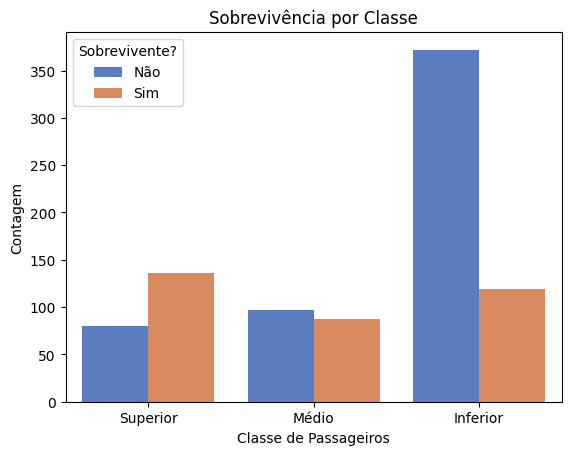

In [58]:
# Criar o gráfico
sns.countplot(data=df, x='Pclass', hue='Survived', palette='muted')
plt.title('Sobrevivência por Classe')
plt.xlabel('Classe de Passageiros')
plt.ylabel('Contagem')

# Modificar os rótulos do eixo x
plt.xticks(ticks=[0, 1, 2], labels=['Superior', 'Médio', 'Inferior'])
plt.legend(title='Sobrevivente?', labels=['Não', 'Sim'])
plt.show()


### O sexo influencia a chance de sobrevivência?

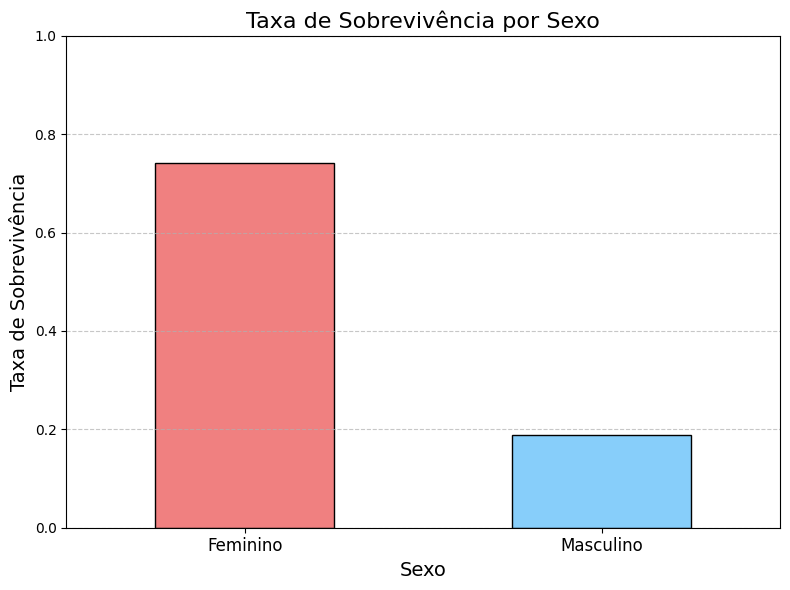

In [60]:
plt.figure(figsize=(8, 6))
sobrevivencia_por_sexo.plot(kind='bar', color=['lightcoral', 'lightskyblue'], edgecolor='black')
plt.title('Taxa de Sobrevivência por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Taxa de Sobrevivência', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'], rotation=0, fontsize=12)
plt.ylim(0, 1)  # Taxa entre 0 e 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2. Demografia:


### Qual é a distribuição etária dos passageiros?

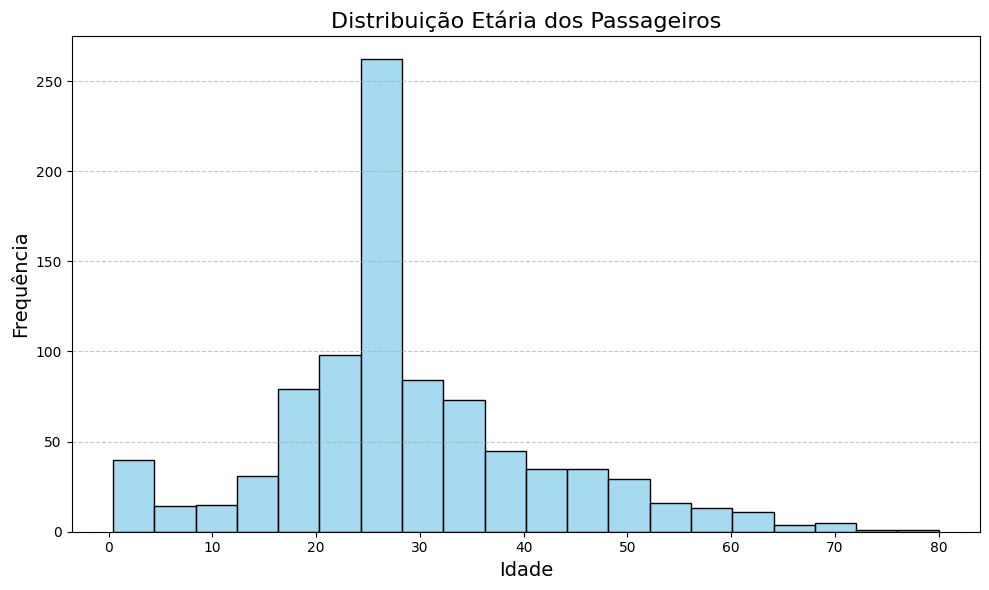

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=False, color="skyblue", edgecolor="black")
plt.title('Distribuição Etária dos Passageiros', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Existem diferenças de idade entre sobreviventes e não sobreviventes?

## 3. Insights